<h1 align = center > Unemployment in India during COVID-19 </h1>

*This dataset provides insights about the unemployment rate in various states across India:*

* States: The different states within India.

* Date: The date when the unemployment rate was recorded.

* Frequency: The frequency of measurement, which is monthly in this dataset.

* Estimated Unemployment Rate (%): The percentage of unemployed individuals in each state of India.

* Estimated Employed: The number of people currently employed.
Estimated Labour Participation Rate (%): The labor force participation rate, which represents the percentage of the working-age population (16-64 years) in the economy who are either employed or actively seeking employment.

<h3 style = 'font-style: italic'> Objective: </h3>

The Primary objectives of this Dataset analysis is to assess the repercussions of the COVID-19 pandamic on Inda's job market. The Dataset under consideration contains crucial information about the unemployment rates across various Indian states. The dataset encompasses key indicators such as States, Date, Measuring Frequency, Estimated Unemployment Rate (%), Estimated Employed Individuals, and Estimated Labour Participation Rate (%).

In [1]:
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns 
import pandas as  pd
import numpy as np
import calendar

<h3 style = 'font-style: italic'> Importing the data </h3> 

*Loading the Dataset imto pandas dataframe*

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/Dataset/main/Unemployment%20Dataset/Unemployment_Rate_upto_11_2020.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.shape

(267, 9)

In [5]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [8]:
# Rename all the columns for better understanding
df.columns=['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
            'Estimated Labour Participation Rate', 'Region', 'Longitude', 'Latitude']

In [9]:
# Converting 'Date' column to datetime format & Extracting the month and creating a "Month" column 
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Month'] =  df['Date'].dt.month

# converting the month to month integer
df['Month_int'] = df['Month'].apply(lambda x : int(x))

# From month integer extracting the "month name" 
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the Original 'Month' column
df.drop(columns='Month', inplace=True)

In [10]:
df['Frequency']= df['Frequency'].astype('category')

In [11]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


<h3 style = 'font-style: italic'> Exploratory Data Analysis </h3> 

In [12]:
df_stats = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
print(round(df_stats.describe().T, 2))

                                     count         mean          std  \
Estimated Unemployment Rate          267.0        12.24        10.80   
Estimated Employed                   267.0  13962105.72  13366318.36   
Estimated Labour Participation Rate  267.0        41.68         7.85   

                                           min         25%         50%  \
Estimated Unemployment Rate               0.50        4.84        9.65   
Estimated Employed                   117542.00  2838930.50  9732417.00   
Estimated Labour Participation Rate      16.77       37.26       40.39   

                                             75%          max  
Estimated Unemployment Rate                16.76        75.85  
Estimated Employed                   21878686.00  59433759.00  
Estimated Labour Participation Rate        44.06        69.69  


In [13]:
df_region = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean().reset_index()

In [14]:
df_region

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.916000,1.960237e+07,40.108750
1,North,15.889620,1.307249e+07,38.702658
2,Northeast,10.950263,3.617106e+06,52.055263
3,South,10.454667,1.404059e+07,40.436167
4,West,8.239000,1.862351e+07,41.257000


*Plotting the heatmap*

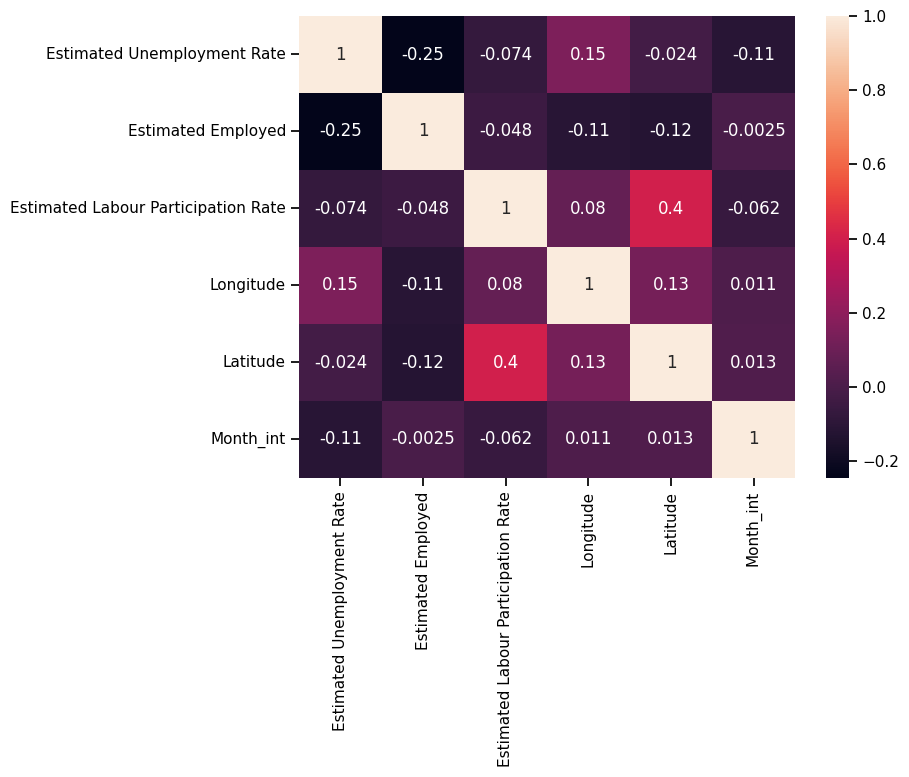

In [15]:
heatmap = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Longitude', 'Latitude', 'Month_int']]
heatmap = heatmap.corr()
plt.figure(figsize=(8,6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=heatmap, annot=True)
plt.show()

*Boxplot of Unemployment rate per States*

In [16]:
import plotly.express as px

In [24]:
fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment rate per States', template='seaborn')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

*Scatter matrix cosidering the employed and unemployed rates*

In [35]:
fig = px.scatter_matrix(df,template='seaborn',dimensions=['Estimated Unemployment Rate', 'Estimated Employed',
                                                        'Estimated Labour Participation Rate'],color='Region',width=750, height=600)

fig.show()

*Bar plot showing the average unemployment rate in each state*

In [42]:
plot_um = df[['Estimated Unemployment Rate', 'States']]
df_unemployment = plot_um.groupby('States').mean().reset_index()

df_unemployment = df_unemployment.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemployment, x='States', y='Estimated Unemployment Rate', color= 'States', title='Average unemployment Rate in States ' ,template='seaborn')
fig.show()

Haryana and Jahrkhand have long been the most unemployed.

*Bar Chart showing the unemployment rate across regions from Jan 2020 to Oct 2020*

In [47]:
fig = px.bar(df, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_name', color='States',
            title='Unemployment rate accross states from Jan 2020 to Oct 2020', template='seaborn', height=700)

fig.update_layout(xaxis={'categoryorder': 'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']= 1000
fig.show()

In the given Graph, During the month of april, the state Punducherry, Tamil Nadum, Jharkhand, Bhiar, Tripura, Haryana, of India saw the major Unemployment.

*Impact Of lockdown on the States*

In [51]:
fig = px.scatter_geo(df,'Longitude', 'Latitude', color="Region",
                    hover_name="States", size="Estimated Unemployment Rate",
                    animation_frame="Month_name",scope='asia',template='seaborn',height=700
                    ,title='Impack of lockdown on Employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=3000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#3399FF",
    showocean=True)

fig.show()

In above chart we see that the northen Region has more unemployment.

In [53]:
# Filtering data for the period before the lockdown (January to April)
bfor_lockdown = df[(df["Month_int"]>=1) & (df['Month_int']<=4)]

# Filtering data for the period before the lockdown (April to July)
lockdown = df[(df['Month_int'] >=4 ) & (df["Month_int"] <=7 )]

#Calculating the mean unemployment rate before lockdown by state
mean_bfor_lock = bfor_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state
mean_lock = lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state
mean_lock['Unemployment Rate before lockdown'] = mean_bfor_lock['Estimated Unemployment Rate']

mean_lock.columns = ['States','Unemployment Rate before lockdown','Unemployment Rate after lockdown']
mean_lock.head()

,States,Unemployment Rate before lockdown,Unemployment Rate after lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [58]:
# percentage change in unemployment rate

mean_lock['Percentage change in Unemployment'] = round(mean_lock['Unemployment Rate after lockdown'] - mean_lock['Unemployment Rate before lockdown']/mean_lock['Unemployment Rate before lockdown'],2)
plot_per = mean_lock.sort_values('Percentage change in Unemployment')


# percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='States',y='Percentage change in Unemployment',color='Percentage change in Unemployment',
            title='Percentage change in Unemployment in each state after lockdown',template='ggplot2',width=900,height=600)
fig.show()

*Conculision*

The Most affected states in the India during the Covid-19 Lockdown in Case of the Unemployment was:

* Tripura
* Haryana
* Bihar
* Puducherry
* Jharkhand
* Jammu & Kashmir
* Delhi